In [64]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [65]:
data = pd.read_csv("networkadds.csv")
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [66]:
data.drop(columns=["User ID","Gender"],inplace=True)

In [67]:
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [68]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [69]:
x = data.iloc[:,:-1]
y = data["Purchased"]

In [70]:
# huge diff between x and y so we need scaling here 
from sklearn.preprocessing import StandardScaler

In [71]:
sc = StandardScaler()

In [72]:
sc.fit(x)

StandardScaler()

In [1]:
st = sc.transform(x)
st

In [74]:
# now the data sis scalled we have to covert it into data frmae 
x = pd.DataFrame(st,columns=x.columns) # we create it in a data frame  then assuign same column names to it 

In [75]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt = DecisionTreeClassifier(max_depth=2) # go down to understand max depth function 

In [102]:
# mpw we use entropy method by default it is gemini see in fig below i create this folder after the execution
dt1 = DecisionTreeClassifier(criterion="entropy")

In [103]:
dt.fit(x_train,y_train) # 1st one

DecisionTreeClassifier(max_depth=2)

In [104]:
dt1.fit(x_train,y_train) # 2nd one new created

DecisionTreeClassifier(criterion='entropy')

In [105]:
dt.score(x_test,y_test)

0.915625

In [106]:
dt1.score(x_test,y_test) # score is improved through entropy 

0.790625

In [107]:
dt.predict([[10,90000]])

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

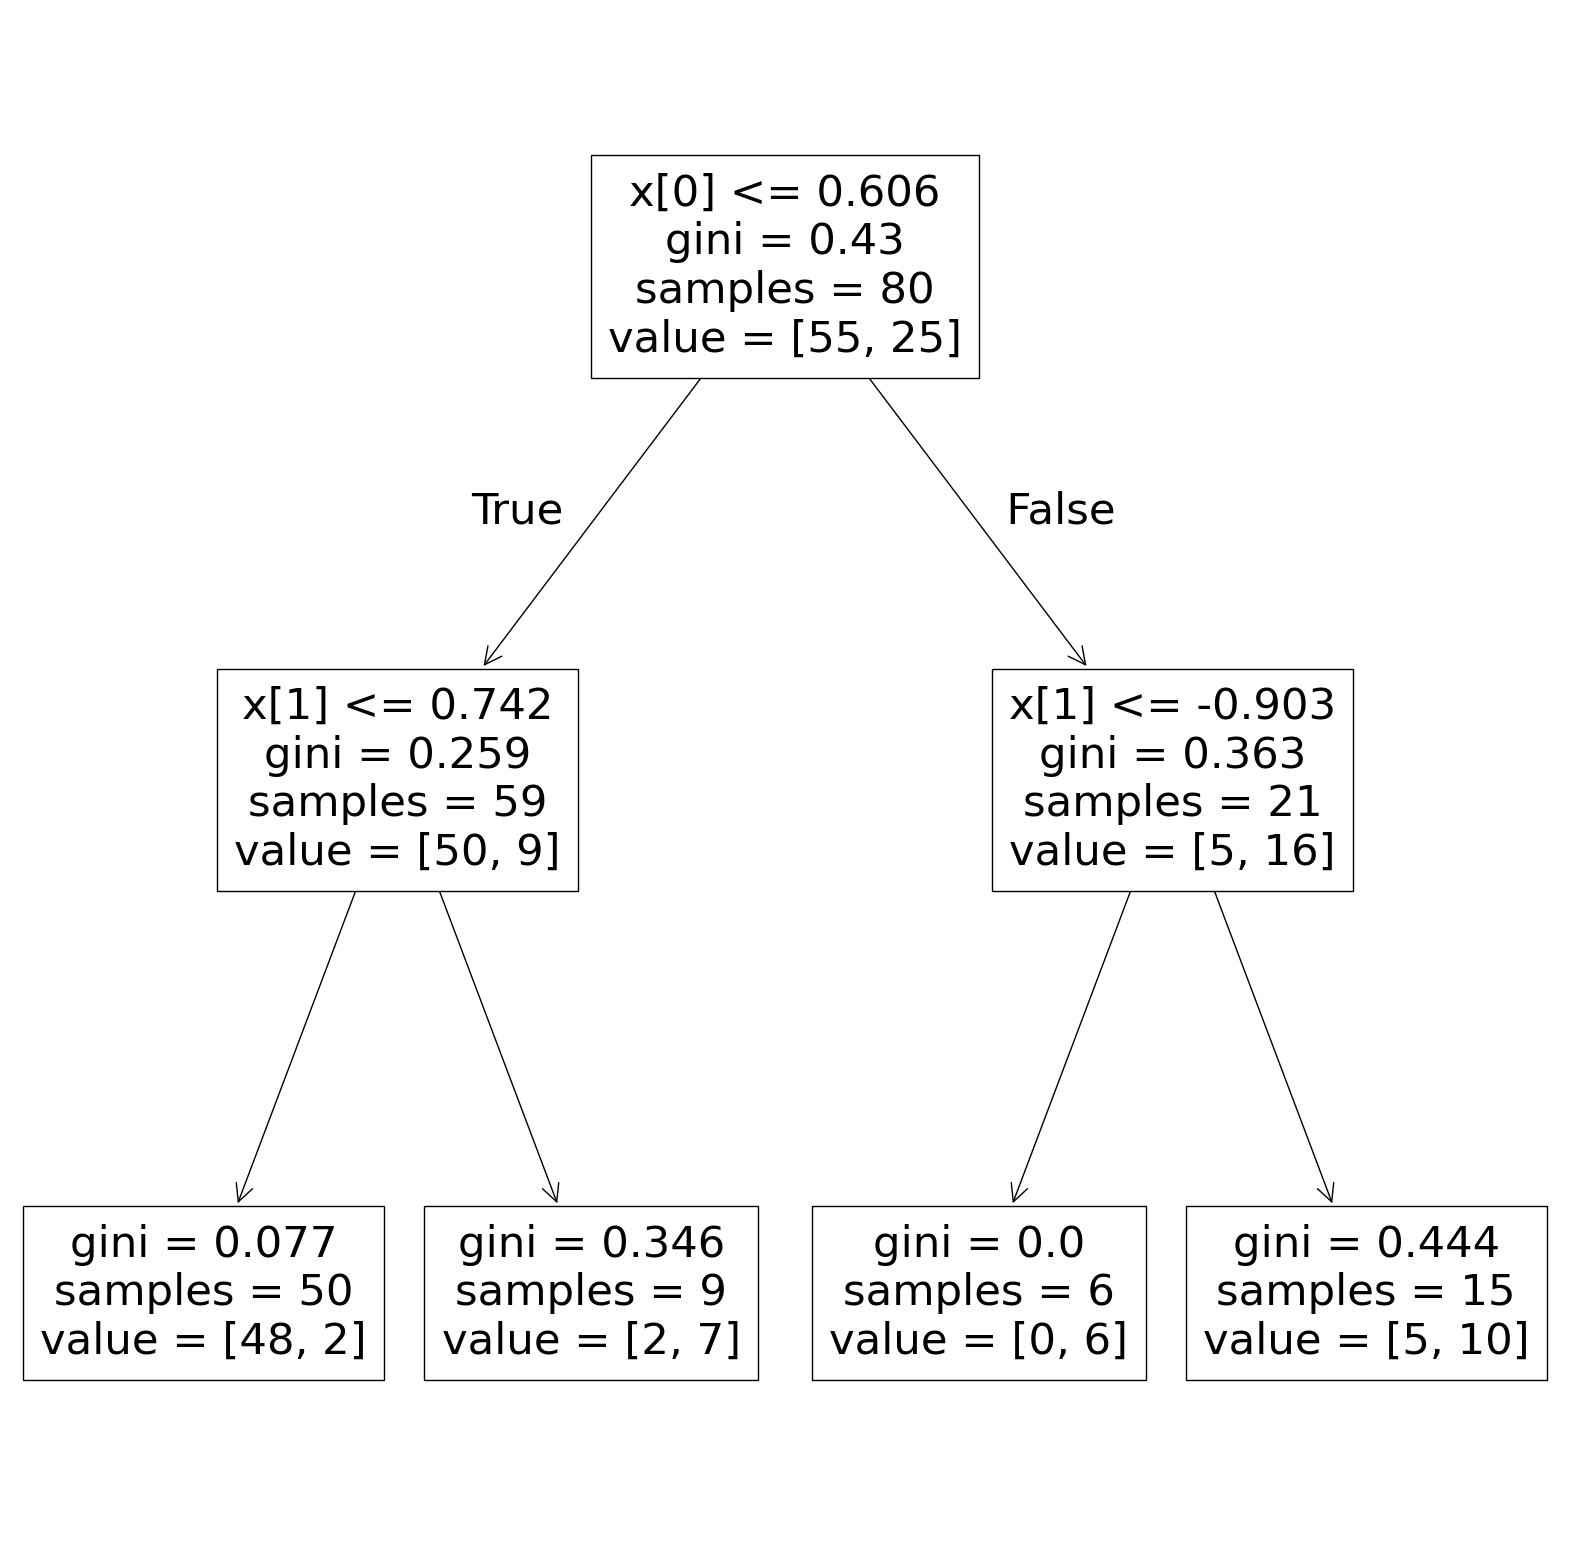

In [108]:
# now we how the decision tree is created which becme the root node subnodet etc 
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(dt)
plt.show()

In [109]:
# now see in grapgh how it seprated the data 
from mlxtend.plotting import plot_decision_regions

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


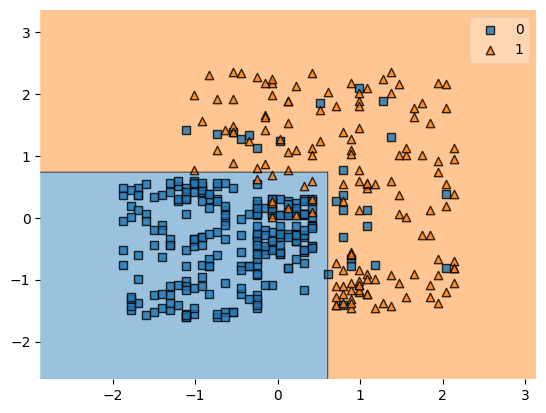

In [110]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

In [111]:
# see how accurately decision tree sep the data 

C:\Users\R c\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


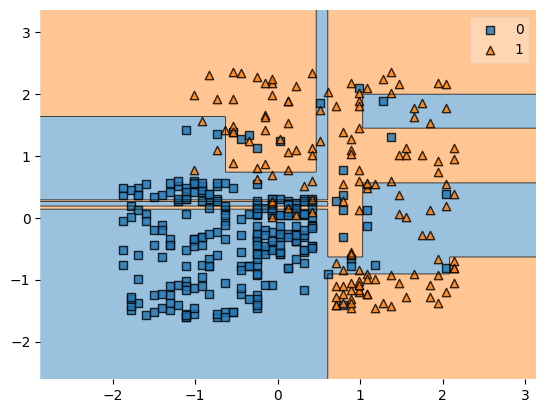

In [112]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt1)
plt.show()

In [113]:
# dt1 is more accurate mean entropy is better then geni here explain in decission_tree on register 

In [114]:
# entropy and gemini are two methods to do this 

# punning

 # pre_punning

In [115]:
# first we check our model is overfitted or not 
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100 

(88.75, 91.5625)

# post punning

In [116]:
for i in range(1,20):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    print(dt2.score(x_train,y_train)*100,dt2.score(x_test,y_test)*100,i)

82.5 84.0625 1
88.75 91.5625 2
92.5 89.375 3
95.0 76.5625 4
97.5 82.8125 5
100.0 82.1875 6
100.0 77.8125 7
100.0 82.8125 8
100.0 77.8125 9
100.0 77.8125 10
100.0 77.8125 11
100.0 82.8125 12
100.0 79.0625 13
100.0 82.1875 14
100.0 82.8125 15
100.0 82.8125 16
100.0 82.1875 17
100.0 82.1875 18
100.0 77.1875 19


In [117]:
# now we can chose our max depth value whihch is 2 

# decission tree in regression 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
data = pd.read_csv("employee_salary.csv")
data.head(3)


,Age,Experience,Salary
0,50,1,56719.30305
1,36,14,59632.24081
2,29,3,40319.43262


In [4]:
data.isnull().sum()

Age           0
Experience    0
Salary        1
dtype: int64

In [10]:
data["Salary"]= pd.to_numeric(data["Salary"],errors="coerce")

In [12]:
data["Salary"].fillna(data["Salary"].mean())

0      56719.303050
1      59632.240810
2      40319.432620
3      56195.813580
4      45877.545210
           ...     
96     95740.098720
97     86357.151260
98     90777.506280
99     58154.338200
100    67788.259624
Name: Salary, Length: 101, dtype: float64

In [13]:
data.isnull().sum()

Age           0
Experience    0
Salary        0
dtype: int64

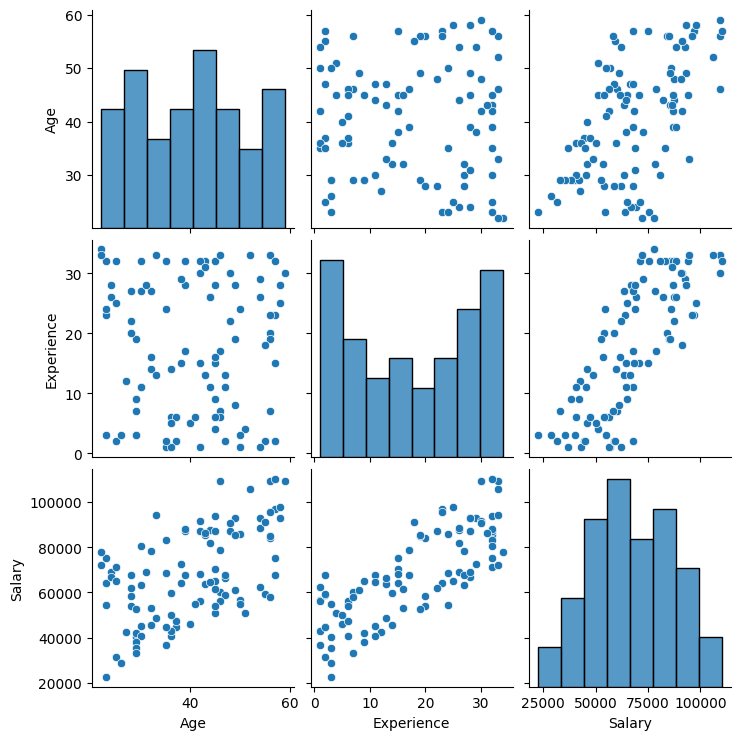

In [14]:
# now check it follows linearity or not 
sns.pairplot(data= data)
plt.show()

In [15]:
# it follws somewhere linearity now we try decission tree on it 
x = data.iloc[:,:-1]
y = data["Salary"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.2,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [36]:
dr = DecisionTreeRegressor(max_depth=1)

In [37]:
dr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=1)

In [38]:
dr.score(x_test,y_test)

0.48463517556736724

In [39]:
dr.score(x_train,y_train) # our model is overfit

0.48323757270372636

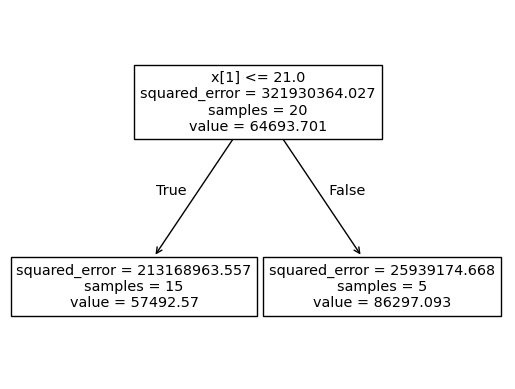

In [40]:
plot_tree(dr)
plt.show()

In [41]:
for i in range(1,20):
    dr = DecisionTreeRegressor(max_depth=i)
    dr.fit(x_train,y_train)
    print(dr.score(x_train,y_train)*100,dr.score(x_test,y_test)*100,i)

48.32375727037264 48.463517556736726 1
75.20610394600294 61.85613534605932 2
95.58424592971484 64.18871603687305 3
98.72297601848908 67.76560188440585 4
99.74991620582546 72.82853085974017 5
99.84262954224027 78.38788185556231 6
99.84262954224027 73.36287793904252 7
99.84262954224027 67.92684858146886 8
99.84262954224027 64.68783189628743 9
99.84262954224027 70.78049718453252 10
99.84262954224027 63.09009889851402 11
99.84262954224027 78.38329059669536 12
99.84262954224027 67.95857461006065 13
99.84262954224027 70.69454005588017 14
99.84262954224027 64.92109938483439 15
99.84262954224027 64.68555393052628 16
99.84262954224027 70.35944203551387 17
99.84262954224027 74.87472446285285 18
99.84262954224027 67.9608525758218 19
